About this Dataset
Voice Gender
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

meanfreq: mean frequency (in kHz)
sd: standard deviation of frequency
median: median frequency (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: skewness (see note in specprop description)
kurt: kurtosis (see note in specprop description)
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid (see specprop)
peakf: peak frequency (frequency with highest energy)
meanfun: average of fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: average of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
label: male or female

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('Voice.csv')

In [4]:
df.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male


In [5]:
sex=pd.get_dummies(df['label'],drop_first=True)

In [6]:
df['male']=sex

In [7]:
df.drop('label',axis=1,inplace=True)

In [8]:
df.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1


In [9]:
import plotly.express as px 

In [10]:
df['kurt*skew']=df['kurt']*df['skew']

In [11]:
df.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male,kurt*skew
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1,3529.771303
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1,14230.127556


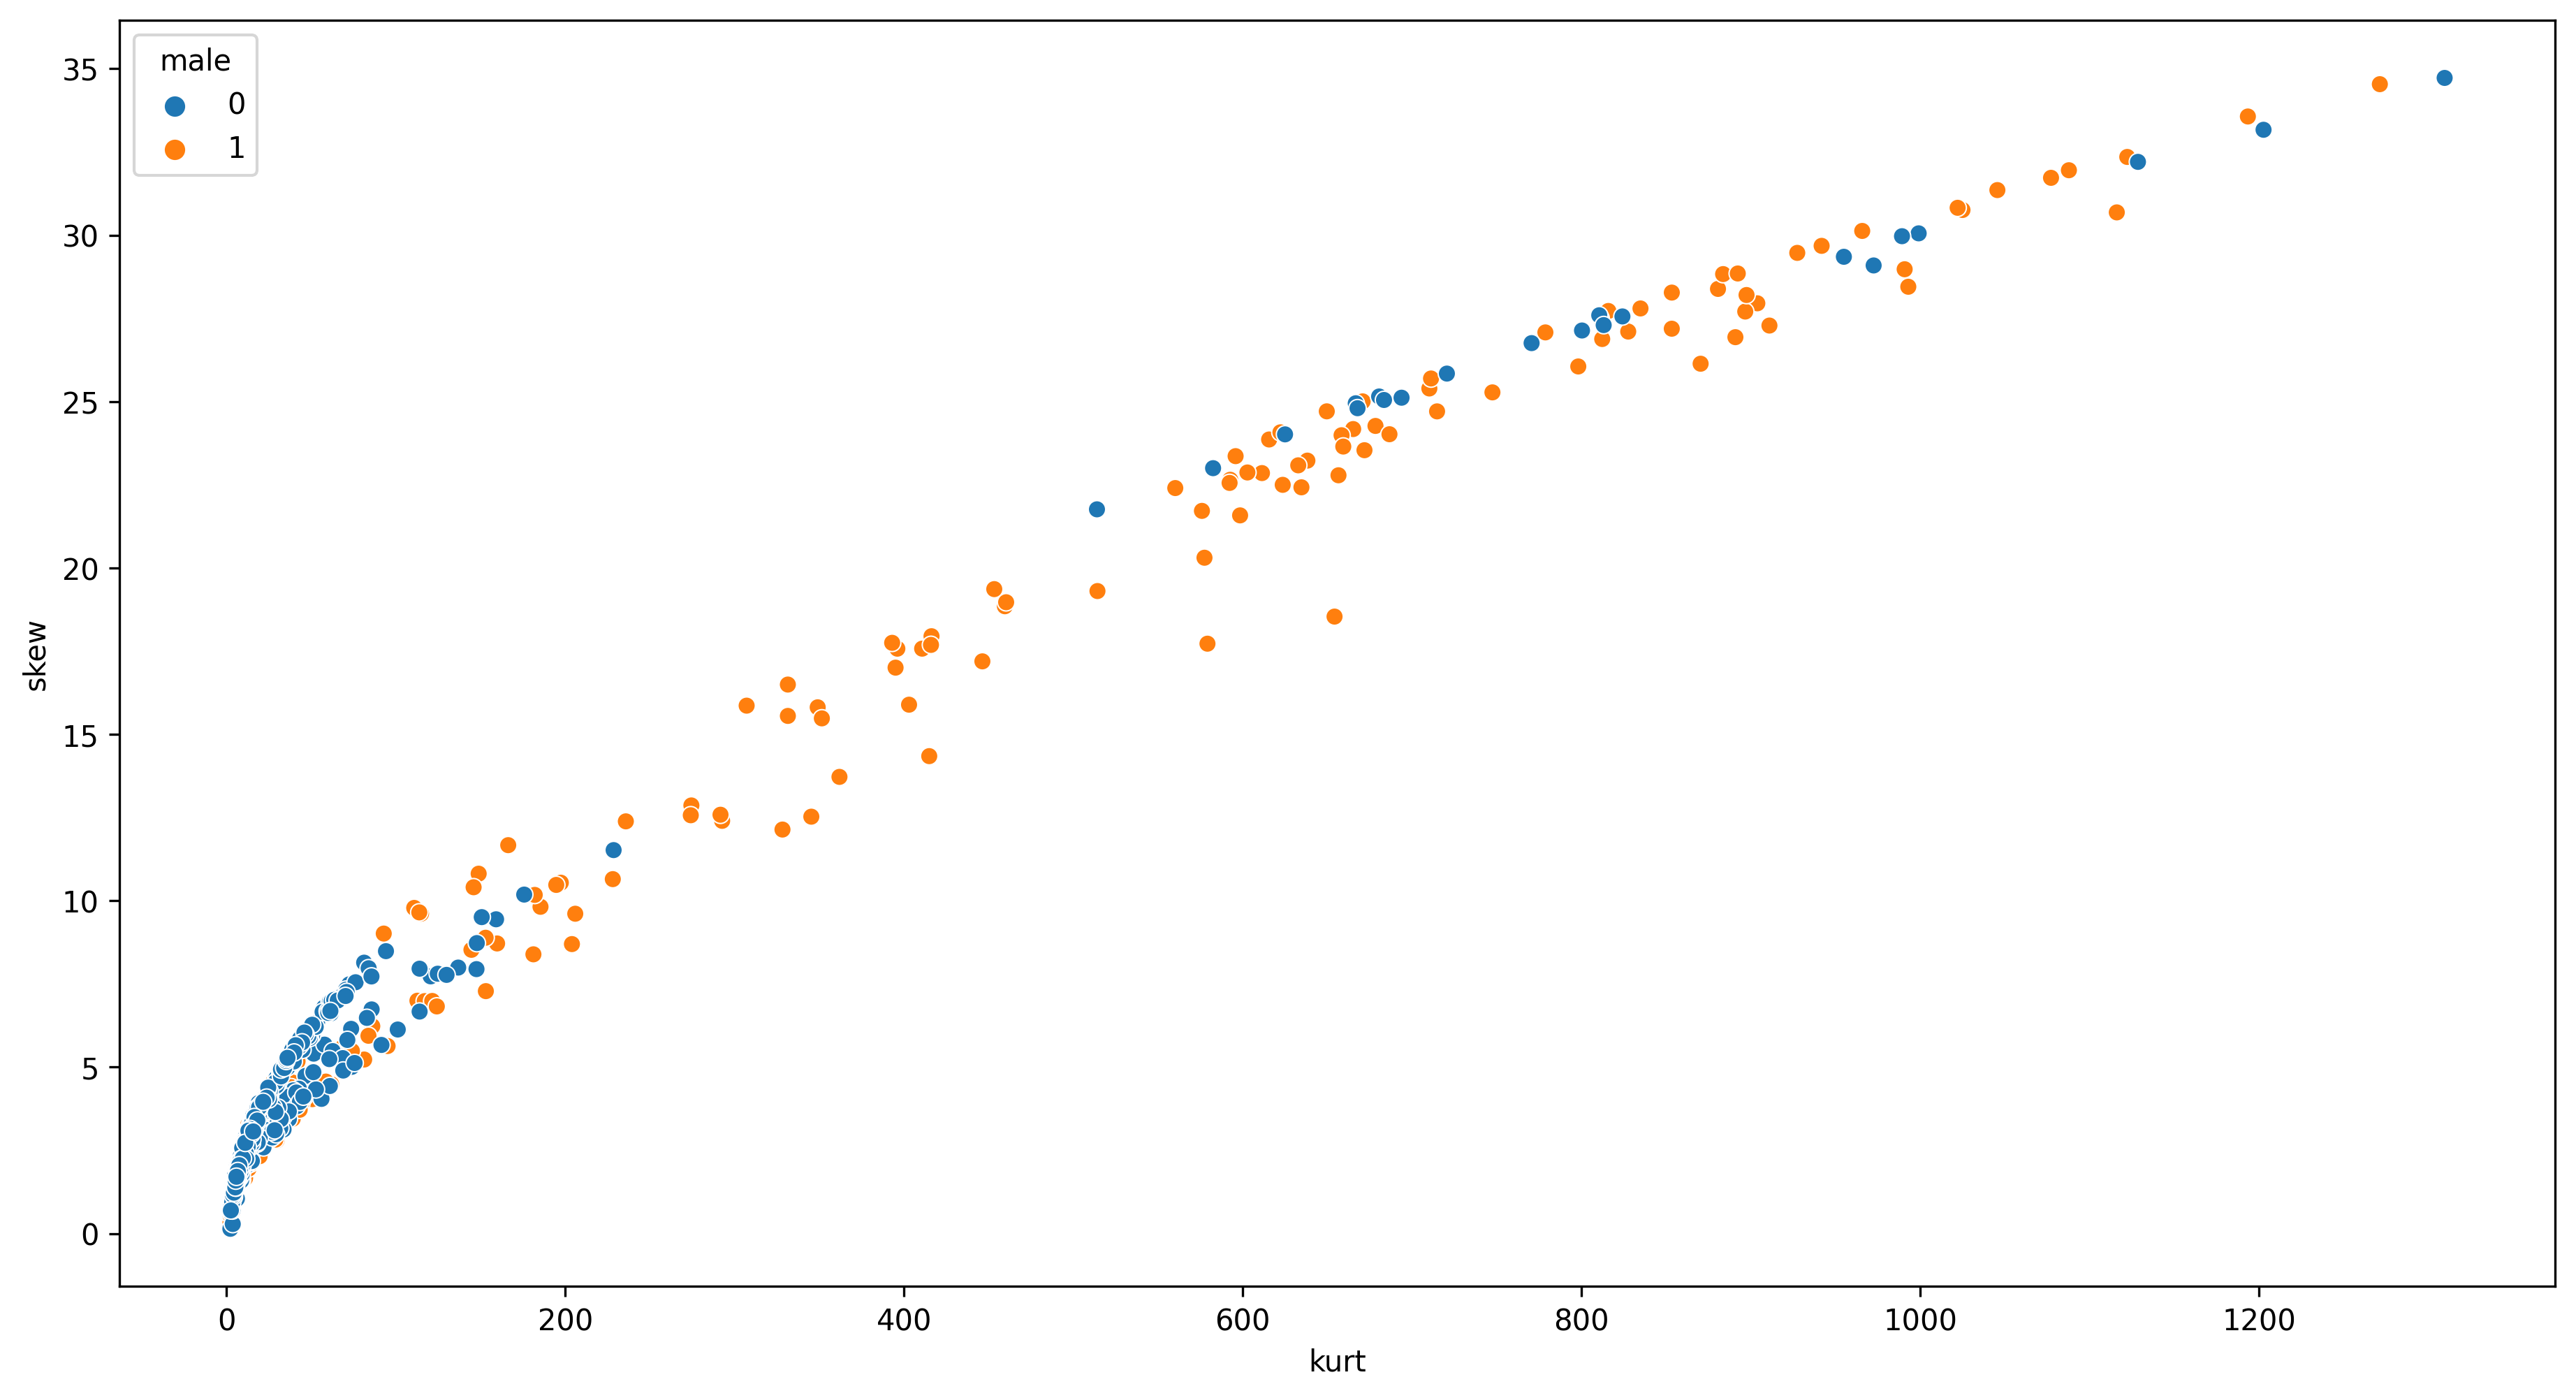

In [12]:
plt.figure(figsize=(15,8),dpi=300)
sns.scatterplot(x=df['kurt'],y=df['skew'],hue=df['male']);

In [13]:
px.scatter_3d(df,x='kurt',y='skew',z='kurt*skew',color='male')

## Train Test Split

In [14]:
df.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male,kurt*skew
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1,3529.771303
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1,14230.127556


In [15]:
X=df.drop('male',axis=1)
y=df['male']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.svm import SVC

### Kernel='linear'

In [21]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [22]:
pred=svc.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,accuracy_score

In [24]:
print(accuracy_score(y_test,pred))

0.4810725552050473


### Scaling The Data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(df.drop('male',axis=1))

StandardScaler()

In [28]:
features=scaler.transform(df.drop('male',axis=1))

In [29]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'male',
       'kurt*skew'],
      dtype='object')

In [30]:
import collections


df_fit=pd.DataFrame(features,columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx',
       'kurt*skew'])

In [32]:
X= df_fit
y=df['male']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

In [36]:
print(accuracy_score(y_test,pred)*100)

96.37223974763407


## Accuracy increased 48%+ just by scaling the data

In [38]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

In [39]:
print(accuracy_score(y_test,pred)*100)

98.10725552050474


In [40]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

In [41]:
print(accuracy_score(y_test,pred)*100)

97.63406940063092


## According to above accuracies kernel rbf is best fit for model to give maximum accuracy.

# Perform K-fold cross validation for acc++